In [1]:
# Requires emoji package

In [2]:
import codecs
import emoji

In [4]:
with codecs.open('watsoncrick003.txt', encoding='utf-8') as f:
    lines = f.read()

In [29]:
# extract all emojis in text
emojis = []
for c in lines:
    if c in emoji.UNICODE_EMOJI and c not in emojis:
        emojis.append(c)

In [79]:
# see https://stackoverflow.com/questions/29760402/converting-a-txt-file-to-an-image-in-python
from PIL import Image, ImageDraw, ImageFont, ImageOps

In [72]:
maxrow = 1200
maxcol = 1200
fontsize = 48

In [73]:
font = ImageFont.truetype('./Symbola/Symbola.ttf', size=fontsize)
image = Image.new('L', (maxcol, maxrow), color=255)
draw = ImageDraw.Draw(image)

In [74]:
# get max width/height for the emojis
maxwidth = max(map(lambda x: font.getsize(x)[0], emojis))
maxheight = max(map(lambda x: font.getsize(x)[1], emojis))
buffer = 20  # in pixel

In [75]:
# make a "plate" of emojis
x = 10
y = 10
for e in emojis:
    draw.text((x, y), e, fill=0, font=font)
    newx = x + buffer + maxwidth
    if newx + maxwidth > maxcol:
        y += maxheight + buffer
        x = 10
    else:
        x = newx

In [82]:
# crop it
c_box = ImageOps.invert(image).getbbox()
image = image.crop(c_box)

In [83]:
image.save('all_emojis.png')

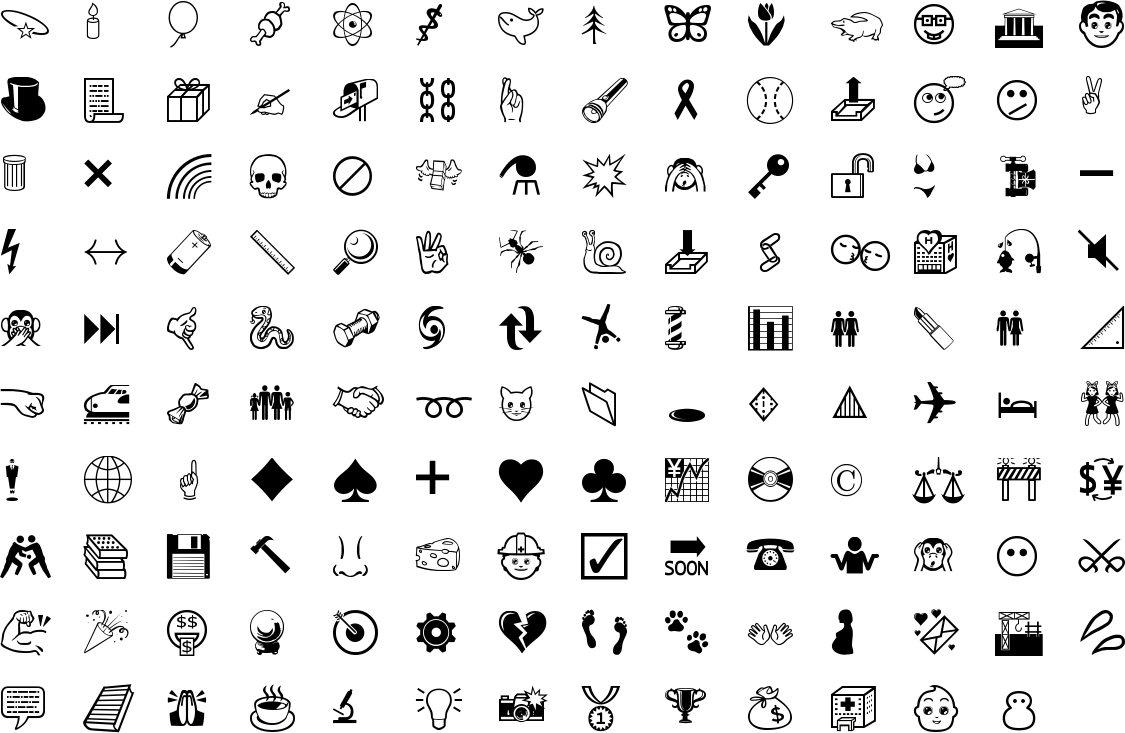

In [84]:
image